# Plots of geodesics in Kerr spacetime
## Computation with `kerrgeodesic_gw`

This Jupyter/SageMath notebook is relative to the lectures
[Geometry and physics of black holes](https://luth.obspm.fr/~luthier/gourgoulhon/bh16/).

It requires [SageMath](http://www.sagemath.org/) (version $\geq$ 8.2), with the package [kerrgeodesic_gw](https://github.com/BlackHolePerturbationToolkit/kerrgeodesic_gw) (version $\geq$ 0.3). To install the latter, simply run 
```
sage -pip install kerrgeodesic_gw
```
in a terminal.

In [1]:
version()

'SageMath version 9.2, Release Date: 2020-10-24'

First, we set up the notebook to use LaTeX-formatted display:

In [2]:
%display latex

and we ask for CPU demanding computations to be performed in parallel on 8 processes:

In [3]:
Parallelism().set(nproc=8)

A Kerr black bole is entirely defined by two parameters $(m, a)$, where $m$ is the black hole mass and $a$ is the black hole angular momentum divided by $m$.
In this notebook, we shall set $m=1$ and we denote the angular momentum parameter $a$ by the symbolic variable `a`, using `a0` for a specific numerical value:

In [4]:
a = var('a')
a0 = 0.998

The spacetime object is created as an instance of the class `KerrBH`:

In [5]:
from kerrgeodesic_gw import KerrBH
M = KerrBH(a)
print(M)

Kerr spacetime M


The Boyer-Lindquist coordinate $r$ of the event horizon:

In [6]:
rH = M.event_horizon_radius()
rH

sqrt(-a^2 + 1) + 1

In [7]:
rH0 = rH.subs({a: a0})
rH0

1.06321392251712

The method `boyer_lindquist_coordinates()` returns the chart of Boyer-Lindquist coordinates `BL` and allows the user to instanciate the Python variables `(t, r, th, ph)` to the coordinates $(t,r,\theta,\phi)$:

In [8]:
BL.<t, r, th, ph> = M.boyer_lindquist_coordinates()
BL

Chart (M, (t, r, th, ph))

The metric tensor is naturally returned by the method `metric()`:

In [9]:
g = M.metric()
g.display()

g = -(a^2*cos(th)^2 + r^2 - 2*r)/(a^2*cos(th)^2 + r^2) dt*dt - 2*a*r*sin(th)^2/(a^2*cos(th)^2 + r^2) dt*dph + (a^2*cos(th)^2 + r^2)/(a^2 + r^2 - 2*r) dr*dr + (a^2*cos(th)^2 + r^2) dth*dth - 2*a*r*sin(th)^2/(a^2*cos(th)^2 + r^2) dph*dt + (2*a^2*r*sin(th)^4 + (a^2*r^2 + r^4 + (a^4 + a^2*r^2)*cos(th)^2)*sin(th)^2)/(a^2*cos(th)^2 + r^2) dph*dph

## Bound timelike geodesic

We set $\mu=1$ and pick some values of $E$, $L$ and $Q$, with $E<1$ to ensure that we are dealing with a bound geodesic:

In [10]:
mu = 1
E = 0.9
#L = 1.9
L = 2.
Q = 1.3

In [11]:
r = var('r')
R(r) = ((E^2 - 1)*r^4 + 2*r^3 + (a0^2*(E^2 - 1) - Q - L^2)*r^2 
       + 2*(Q + (L - a0*E)^2)*r - a0^2*Q)

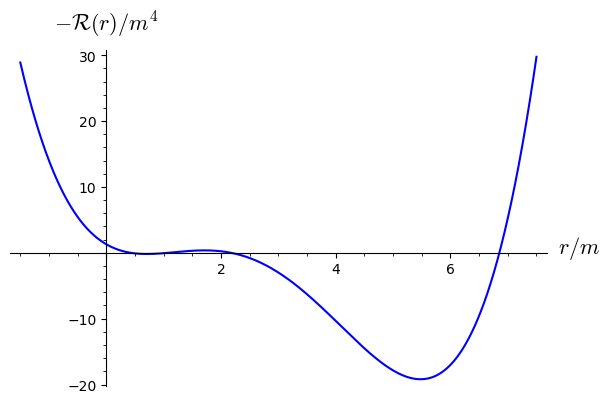

In [12]:
graph = plot(-R(r), (r, -1.5, 7.5), thickness=1.5,
             axes_labels=[r'$r/m$', r'$-\mathcal{R}(r)/m^4$'])
graph

In [13]:
rp = find_root(R(r), 1.5, 4)
rp

2.1752102281015393

In [14]:
ra = find_root(R(r), 5, 10)
ra

6.852695179907905

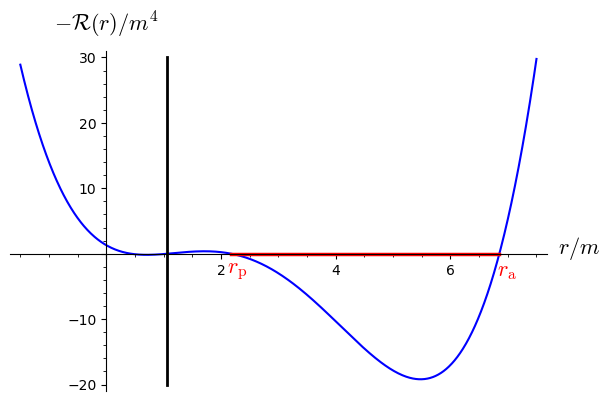

In [15]:
graph += line([(rp, 0), (ra, 0)], thickness=2.5, color='red') \
         + text(r'$r_{\rm p}$', (1.05*rp, -2.5), color='red', fontsize=16) \
         + text(r'$r_{\rm a}$', (1.02*ra, -2.5), color='red', fontsize=16) 
graph += line([(rH0, -20), (rH0, 30)], thickness=2, color='black')
graph

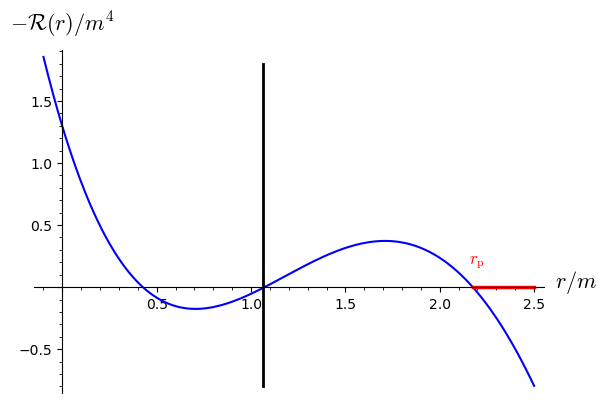

In [16]:
zoom = plot(-R(r), (r, -0.1, 2.5), thickness=1.5, 
            axes_labels=[r'$r/m$', r'$-\mathcal{R}(r)/m^4$'])
zoom += line([(rp, 0), (2.5, 0)], thickness=2.5, color='red') \
        + text(r'$r_{\rm p}$', (1.01*rp, 0.2), color='red', fontsize=12)
zoom += line([(rH0, -0.8), (rH0, 1.8)], thickness=2, color='black')
zoom

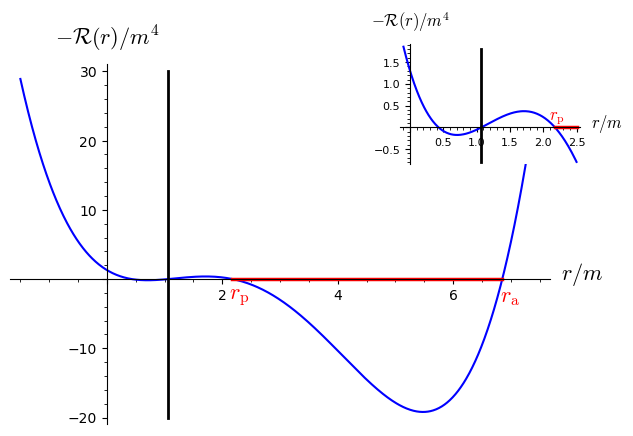

In [17]:
graph = graph.inset(zoom, (0.7, 0.7, 0.3, 0.3), fontsize=8)
graph

In [18]:
graph.save("gek_R_potential.pdf")

Let us choose the initial point $P$ for the geodesic:

In [19]:
P = M.point((0, (rp + ra)/2, pi/2, 0), name='P')
print(P)

Point P on the Kerr spacetime M


A geodesic is constructed by providing the range $[\lambda_{\rm min},\lambda_{\rm max}]$ of the affine parameter $\lambda$, the initial point and either 
 - (i) the Boyer-Lindquist components $(p^t_0, p^r_0, p^\theta_0, p^\phi_0)$ of the initial 4-momentum vector
   $p_0 = \left. \frac{\mathrm{d}x}{\mathrm{d}\lambda}\right| _{\lambda_{\rm min}}$,
 - (ii) the four integral of motions $(\mu, E, L, Q)$
 - or (iii) some of the components of $p_0$ along with with some integrals of motion. 
We shall also specify some numerical value for the Kerr spin parameter $a$.

Here, we choose $\lambda\in[0, 600\, m]$, the option (ii) and 
$a=0.998 \,m$, where $m$ in the black hole mass::


In [20]:
lmax = 600 # lambda_max

In [21]:
Li = M.geodesic([0, lmax], P, mu=mu, E=E, L=L, Q=Q, a_num=0.998,
                name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 1.51876198038160 d/dt + 0.187663512911857 d/dr + 0.0559574180643787 d/dth + 0.122475774691562 d/dph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [22]:
print(Li)

Geodesic Li of the Kerr spacetime M


The numerical integration of the geodesic equation is performed via `integrate()`, by providing the integration step $\delta\lambda$ in units of $m$:

In [23]:
Li.integrate(step=0.005)

We can then plot the geodesic:

In [24]:
Li.plot(plot_points=2000, thickness=1.5)

Graphics3d Object

Actually, many options can be passed to the method `plot()`. For instance to a get a 3D spacetime diagram:

In [25]:
Li.plot(coordinates='txy', thickness=2)

Graphics3d Object

or to get the trace of the geodesic in the $(x,y)$ plane:

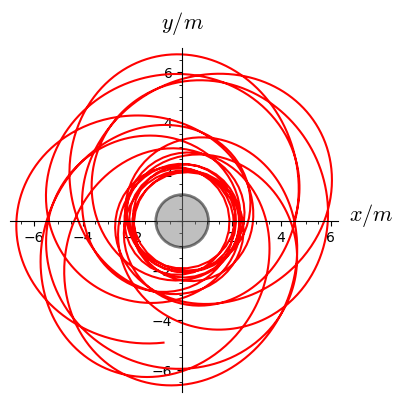

In [26]:
graph = Li.plot(coordinates='xy', plot_points=2000, thickness=1.5, 
                axes_labels=[r'$x/m$', r'$y/m$'])
graph

In [27]:
graph.save("gek_timelike_xy.pdf")

or else to get the trace in the $(x,z)$ plane:

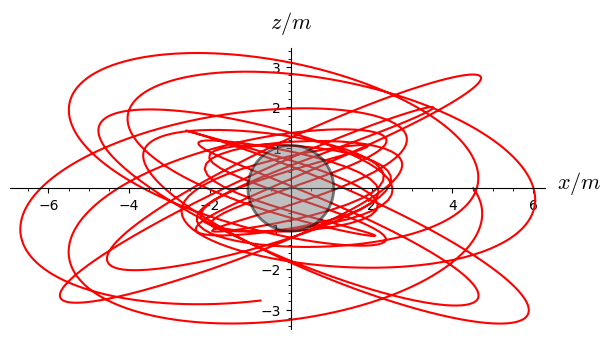

In [28]:
graph = Li.plot(coordinates='xz', plot_points=2000, thickness=1.5, 
                axes_labels=[r'$x/m$', r'$z/m$'])
graph

In [29]:
graph.save("gek_timelike_xz.pdf")

In [30]:
th = var('th', latex_name=r'\theta')
V(th) = cos(th)^2 * (a0^2*(1 - E^2) + L^2/sin(th)^2)
V(th)

(4.00000000000000/sin(th)^2 + 0.189240760000000)*cos(th)^2

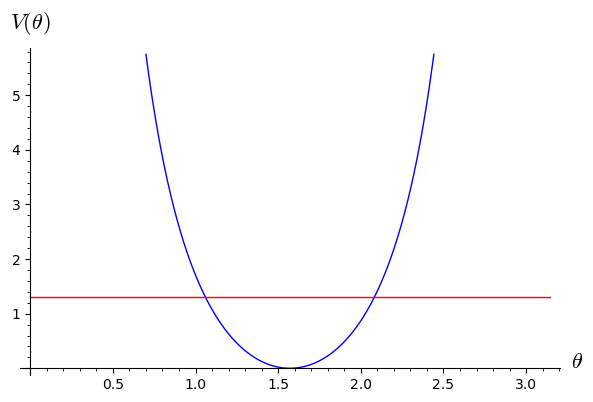

In [31]:
graph = plot(V(th), (th, 0.7, pi-0.7), axes_labels=[r'$\theta$', r'$V(\theta)$'])
graph += line([(0, Q), (pi, Q)], color='red')
graph

In [32]:
th_min = find_root(V(th) - Q, 0.5, pi/2)
th_min

1.060238228434118

Analytic formula for $\theta_{\rm min}$:

In [33]:
A2 = a0^2*(mu^2 - E^2)
sthm = (A2 - L^2 - Q + sqrt((L^2 + Q - A2)^2 + 4*L^2*A2))/(2*A2)
th_min0 = arcsin(sqrt(sthm))
th_min0

1.06023822843412

In [34]:
th_min - th_min0

-8.88178419700125e-16

In [35]:
th_min_deg = n(th_min/pi*180)
th_min_deg

60.7471757677022

In [36]:
th_inc_deg = 90 - th_min_deg
th_inc_deg

29.2528242322978

In [37]:
p_K = 2*ra*rp/(ra + rp)
p_K

3.3022172855673317

In [38]:
e_K = (ra - rp)/(ra + rp)
e_K

0.5181140852070248

Let us check that the values of $\mu$, $E$, $L$ and $Q$ evaluated at $\lambda=300 \, m$ are equal to those at $\lambda=0$ up to the numerical accuracy of the integration scheme:

In [39]:
Li.check_integrals_of_motion(lmax)

quantity,value,initial value,diff.,relative diff.
,,,,
,,,,
,,,,
,,,,


Decreasing the integration step leads to smaller errors:

In [40]:
Li.integrate(step=0.001)
Li.check_integrals_of_motion(lmax)

quantity,value,initial value,diff.,relative diff.
,,,,
,,,,
,,,,
,,,,


## Ingoing null geodesic with negative angular momentum

We choose a ingoing null geodesic in the equatorial plane with $L = -6 E < 0$, starting at the point of Boyer-Lindquist coordinates $(t,r,\theta,\phi) = (0, 12, \pi/2, 0)$:

In [41]:
lmax = 13.07
Li = M.geodesic([0, lmax], M((0,12,pi/2,0)), mu=0, E=1, L=-6, Q=0,
                r_increase=False, a_num=a0, 
                name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 1.20797381595070 d/dt - 0.901996260873419 d/dr - 0.0399489777089388 d/dph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [42]:
Li.integrate(step=0.00002)

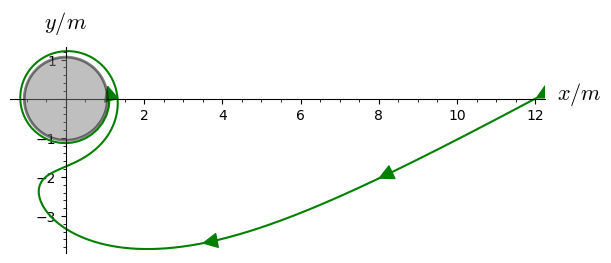

In [43]:
graph = Li.plot(coordinates='xy', color='green', prange=[0, lmax], plot_points=40000, 
                thickness=1.5, display_tangent=True, scale=0.0001, 
                color_tangent='green', plot_points_tangent=4, 
                axes_labels=[r'$x/m$', r'$y/m$'])
graph

In [44]:
graph.save('gek_winding_null.pdf')

In [45]:
Li.check_integrals_of_motion(0.9999*lmax)

quantity,value,initial value,diff.,relative diff.
,,,,
,,,,
,,,,
,,,,-


## Ingoing time geodesic with zero angular momentum

In [46]:
lmax = 26.41
Li = M.geodesic([0, lmax], M((0,15,pi/2,0)), mu=1, E=1, L=0, Q=0,
                r_increase=False, a_num=a0, 
                name='Li', latex_name=r'\mathcal{L}', verbose=True)

Initial tangent vector: 


p = 1.15374191268376 d/dt - 0.365955677542959 d/dr + 0.000678925406390768 d/dph

The curve was correctly set.
Parameters appearing in the differential system defining the curve are [a].


In [47]:
Li.integrate(step=0.0002)

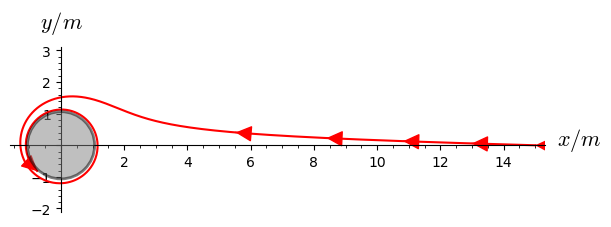

In [48]:
graph = Li.plot(coordinates='xy', color='red', prange=[0, lmax], plot_points=40000, 
                thickness=1.5, display_tangent=True, scale=0.0001, 
                color_tangent='red', plot_points_tangent=6, 
                axes_labels=[r'$x/m$', r'$y/m$'])
show(graph, ymin=-2, ymax=3)

In [49]:
graph.save('gek_frame_dragging.pdf')

In [50]:
Li.check_integrals_of_motion(0.9999*lmax)

quantity,value,initial value,diff.,relative diff.
,,,,
,,,,
,,,,
,,,,-
